In [244]:
import qubit
reload(qubit)
import cpwtools
reload(cpwtools)
inductiveCoupling = __import__("Transmission Lines.inductiveCoupling")
import capacitance as cap
import numpy as np
from scipy.constants import mu_0, epsilon_0, pi, hbar, e, c
from scipy.constants import physical_constants
from scipy.optimize import fsolve, root

%matplotlib inline

import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

## Inductive Coupling ##
From [1], we have the dephasing of a qubit:  
$\Gamma_\phi = \eta\frac{4\chi^2}{\kappa}\bar{n}$, where $\eta=\frac{\kappa^2}{\kappa^2+4\chi^2}$, $\bar{n}=\left(\frac{\Delta}{2g}\right)^2$  
$\Gamma_\phi = \frac{4\chi^2\kappa}{\kappa^2+4\chi^2}\left(\frac{\Delta}{2g}\right)^2$  
To maximize the efficiency of readout, we want to maximize the rate of information leaving the system (into the readout chain), or equivilently, maximize dephasing.  
$\partial_\kappa\Gamma_\phi = 0 = -\frac{4\chi^2(\kappa^2-4\chi^2)}{(\kappa^2+4\chi^2)^2}$ when $2\chi=\kappa$.  
$2\chi = \kappa_r = \omega_r/Q_r$  
$ Q_{r,c} = \frac{8Z_0^2}{\pi(\omega M)^2}$  [2]  
We want a $Q_c$ of 3k-30k  
  
[1] Yan et al. The flux qubit revisited to enhance coherence and reproducibility. Nature Communications, 7, 1–9. http://doi.org/10.1038/ncomms12964  
[2] Matt Beck's Thesis, p.39

In [292]:
cpw = cpwtools.CPW(material='Nb', w=10., s=7.)

## Inductex vs Matt's Code ##

The inductance per unit length is 8.39e-08 H/m
The inductance per unit length is 7.17e-08 H/m
The inductance per unit length is 6.35e-08 H/m
The inductance per unit length is 5.74e-08 H/m
The inductance per unit length is 5.24e-08 H/m
The inductance per unit length is 4.83e-08 H/m
The inductance per unit length is 4.49e-08 H/m
The inductance per unit length is 4.19e-08 H/m
The inductance per unit length is 3.93e-08 H/m
The inductance per unit length is 3.70e-08 H/m


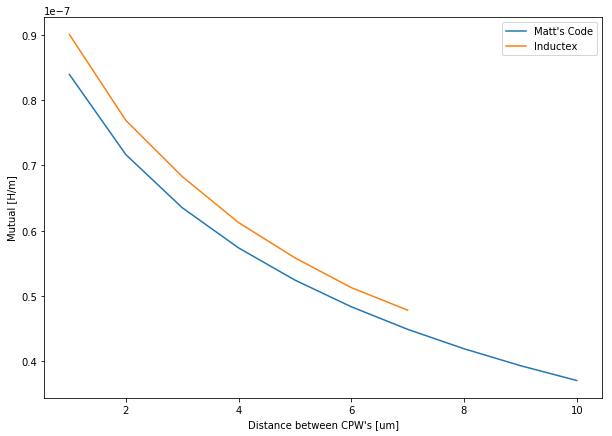

In [174]:
d_list = [1,2,3,4,5,6,7,8,9,10]
inductex_M = np.array([27.017, 23.076, 20.492, 18.375, 16.753, 15.384, 14.347, np.nan, np.nan, np.nan])*1e-12/300e-6
MperL_list = [inductiveCoupling.inductiveCoupling.CalcMutual(cpw.w*1e6, cpw.w*1e6, cpw.s*1e6, cpw.s*1e6, d, 10*cpw.w*1e6)[0] for d in d_list]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(d_list, MperL_list, label="Matt's Code")
ax.plot(d_list, inductex_M, label="Inductex")
ax.legend()
plt.xlabel("Distance between CPW's [um]")
plt.ylabel('Mutual [H/m]')
fig.set_size_inches(10,7)

## Do we have a long enough line to simulate this well? ##

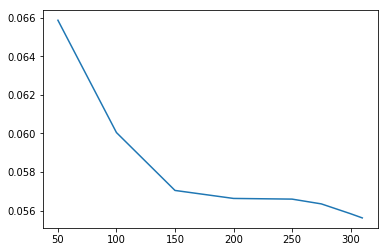

In [10]:
l = np.array([50,100,150,200,250,275,300,310])
m = np.array([3.2933,6.0048,8.5574,11.327,14.150,15.497,16.753,17.244])
plt.plot(l,m/l)

## Vary CPW-CPW spacing $d$ with fixed overlap = 125um ##

The inductance per unit length is 8.39e-08 H/m
The inductance per unit length is 7.17e-08 H/m
The inductance per unit length is 6.35e-08 H/m
The inductance per unit length is 5.74e-08 H/m
The inductance per unit length is 5.24e-08 H/m
The inductance per unit length is 4.83e-08 H/m
The inductance per unit length is 4.49e-08 H/m
The inductance per unit length is 4.19e-08 H/m
The inductance per unit length is 3.93e-08 H/m
The inductance per unit length is 3.70e-08 H/m
The inductance per unit length is 3.50e-08 H/m
The inductance per unit length is 3.16e-08 H/m
The inductance per unit length is 2.88e-08 H/m
The inductance per unit length is 2.65e-08 H/m


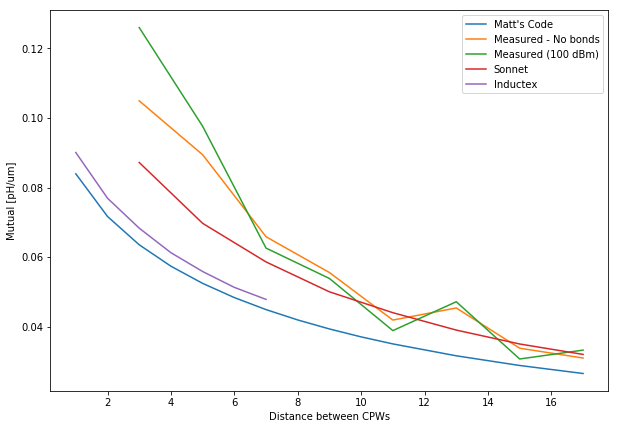

In [293]:
d_list_8R = [3,5,7,9,11,13,15,17]
measured_omega = np.array([4.80344, 4.90578, 5.0153, 5.12538, 5.24146, 5.36316, 5.48865, 5.62217])*2*pi*1e9
measured_Qc_noBonds = np.array([29.7e3, 39.2e3, 69.2e3, 93.1e3, 156.6e3, 127.5e3, 219.4e3, 249.1e3])
measured_Qc_100dBm = np.array([2.06e4, 3.29e4, 7.66e4, 9.91e4, 1.82e5, 1.18e5, 2.66e5, 2.16e5])
measured_MperL_noBonds = np.sqrt(8/pi/measured_Qc_noBonds)*cpw.z0()/measured_omega/150e-6
measured_MperL_100dBm = np.sqrt(8/pi/measured_Qc_100dBm)*cpw.z0()/measured_omega/150e-6
measured_MperL_sonnet = np.array([8.72,6.97,5.86,5.0,4.4,3.9,3.5,3.2])*1e-8
d_list_matt = [1,2,3,4,5,6,7,8,9,10,11,13,15,17]
MperL_list = np.array([inductiveCoupling.inductiveCoupling.CalcMutual(cpw.w*1e6, cpw.w*1e6, cpw.s*1e6, cpw.s*1e6, d, 10*cpw.w*1e6)[0] for d in d_list_matt])

d_list_sonnet = [1,2,3,4,5,6,7,8,9,10]
inductex_M = np.array([27.017, 23.076, 20.492, 18.375, 16.753, 15.384, 14.347, np.nan, np.nan, np.nan])*1e-12/300e-6

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(d_list_matt, 1.0e6*MperL_list, label="Matt's Code") 
ax.plot(d_list_8R, 1.0e6*measured_MperL_noBonds, label="Measured - No bonds")
ax.plot(d_list_8R, 1.0e6*measured_MperL_100dBm, label="Measured (100 dBm)")
ax.plot(d_list_8R, 1.0e6*measured_MperL_sonnet,label="Sonnet")
ax.plot(d_list_sonnet, 1.0e6*inductex_M,label="Inductex")
ax.legend()
plt.xlabel('Distance between CPWs')
plt.ylabel('Mutual [pH/um]')
fig.set_size_inches(10,7)

In [294]:
measured_MperL_noBonds

array([1.04932150e-07, 8.94309954e-08, 6.58399061e-08, 5.55441412e-08,
       4.18784898e-08, 4.53589843e-08, 3.37874423e-08, 3.09562489e-08])

## What does the curl at the end add? ##

For 300um coupling length (GapMax 6), curls at both ends

No curve:  17.308 pH

Yes curve: 18.670 pH

## What should we have expected for the Q on the last device to be? ##

In [187]:
w0 = 2*pi*5.3e9
#MperL = inductiveCoupling.inductiveCoupling.CalcMutual(cpw.w*1e6, cpw.w*1e6, cpw.s*1e6, cpw.s*1e6, 5, 10*cpw.w*1e6)[0]
M = 320e-6*MperL + 1.36e-12  # 1.35e-7
print 8*cpw.z0()**2/pi/w0**2/M**2
M = 320e-6*measured_MperL_20dBm[1] + 1.36e-12  # 1.35e-7
print 8*cpw.z0()**2/pi/w0**2/M**2

21140.674035092055
8752.410009119203


## What if we overexposed the CPWs? ##

In [184]:
cpw = cpwtools.CPW(material='al', w=10., s=7.)
inductiveCoupling.inductiveCoupling.CalcMutual(cpw.w*1e6, cpw.w*1e6, cpw.s*1e6, cpw.s*1e6, 5, 10*cpw.w*1e6)[0]
cpw = cpwtools.CPW(material='al', w=9., s=8.)
inductiveCoupling.inductiveCoupling.CalcMutual(cpw.w*1e6, cpw.w*1e6, cpw.s*1e6, cpw.s*1e6, 4, 10*cpw.w*1e6)[0]

The inductance per unit length is 5.24e-08 H/m
The inductance per unit length is 6.14e-08 H/m


6.14198512066195e-08

## Christian's Mask ##

$ Q_c = \frac{2Z_0}{Z_R}\left(\frac{L_R}{M}\right)^2 $

The inductance per unit length is 3.81e-08 H/m
        f       Q_c     Qc_SZ         M
  2.72GHz  127493.11  88100.00   13.77pH
  3.40GHz  99787.95  115600.00   10.63pH
  4.01GHz  83039.56  97200.00   10.58pH
  4.47GHz  72777.98  59400.00   12.67pH
  4.81GHz  66182.07  32300.00   16.38pH
  5.06GHz  61576.47  27300.00   17.19pH
  5.27GHz  57851.20  31900.00   15.41pH
  5.54GHz  53713.56  21600.00   18.05pH


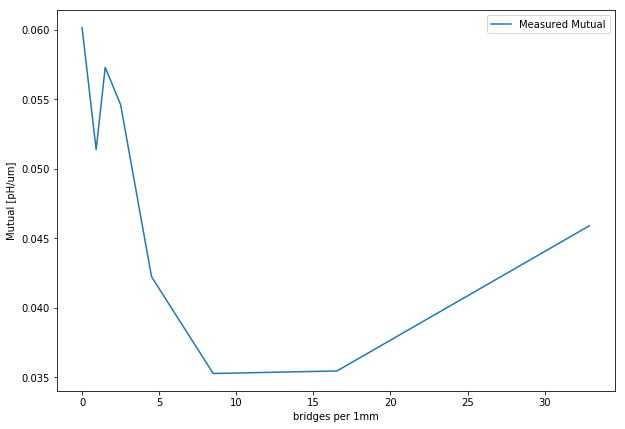

In [291]:
cpwx = cpwtools.CPWWithBridges(material='Nb', w=10, s=7, bridgeSpacing = 250, bridgeWidth = 3, t_oxide=0.1)
cpwx.setKineticInductanceCorrection(False)
L4 = cpwtools.QuarterLResonator(cpwx, 9000)
MperL = inductiveCoupling.inductiveCoupling.CalcMutual(cpw.w*1e6, cpwx.w*1e6, cpw.s*1e6, cpwx.s*1e6, 9.5, 10*cpw.w*1e6)[0]
M = MperL * 300e-6
halfTurn = 124*pi/2
baseL = 2000 + 2000 + 3*halfTurn + 300 + (225.5-124-10)
resExtension = [1243.697, 1118.694, 993.697, 868.694, 743.697, 618.694, 493.697, 368.694]
bridgeSpacing = np.array([30.4, 60.5, 117.6, 222, 400, 666, 997.397+halfTurn/2, 1e8])
Qc_SZ = np.array([88.1, 115.6, 97.2, 59.4, 32.3, 27.3, 31.9, 21.6])*1000 # measured and fit by Shaojiang
M_measured = np.zeros(len(bridgeSpacing))
print "{:>9}  {:>8}  {:>8}  {:>8}".format('f','Q_c', 'Qc_SZ', 'M')
for i in range(len(bridgeSpacing)):
    cpwx.bridgeSpacing = bridgeSpacing[i] * 1e-6
    L4.l = (baseL + resExtension[i])*1e-6
    Qc = 2*cpw.z0()/cpwx.z0() * (L4.L()/M)**2
    M_measured[i] = np.sqrt(2*cpw.z0()/cpwx.z0()/Qc_SZ[i]) * L4.L()
    print "{:>6.2f}GHz  {:>8.2f}  {:>8.2f}  {:>6.2f}pH".format(L4.fl()/1e9, Qc, Qc_SZ[i], M_measured[i]*1e12)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(1000./bridgeSpacing, 1e6*M_measured/300e-6, label="Measured Mutual") 
ax.legend()
plt.xlabel('bridges per 1mm')
plt.ylabel('Mutual [pH/um]')
fig.set_size_inches(10,7)

In [274]:
lengths = np.array([288,276,266,300])*1e-6
lengths = np.array([394,406])*1e-6
MperL = inductiveCoupling.inductiveCoupling.CalcMutual(cpw.w*1e6, cpwx.w*1e6, cpw.s*1e6, cpwx.s*1e6, 5., 10*cpw.w*1e6)[0]
L4 = cpwtools.QuarterLResonator(cpw, 9000)
L4.setLengthFromFreq(5.3e9)
for l in lengths:
    print 2*cpw.z0()/cpw.z0() * (L4.L()/(MperL*l+1.36e-12))**2

The inductance per unit length is 5.24e-08 H/m
15871.808251453489
15002.163726328658


In [260]:
cpwx.bridgeSpacing = bridgeSpacing[0] * 1e-6
print cpw.z0(), cpw.Cl(), 1/np.sqrt(cpw.Ll()*cpw.Cl())/1e8, cpw.vph()/1e8, cpw.Ll()
print cpwx.z0(), cpwx.Cl(), np.sqrt(cpwx.Cl()), cpwx.vph()/1e8, cpwx.Ll()

51.302701750688236 1.6446890266454018e-10 1.1851572245118174 1.1851572245118174 4.328767583711986e-07
29.27251485325644 5.052386311716406e-10 2.247751390104432e-05 0.6761505647521889 4.3292894185461344e-07
